**Informaiton Retrieval Programming Assignment #5**
<br>**Web Query Log Analysis**
<br>Analyze the web queries and learn about user queries


<br><br>**Author:** Helen Ting He; **Date:** Nov 13, 2021

In [171]:
import pandas as pd
import io
import re
import matplotlib.pyplot as plt

In [1]:
# upload files
from google.colab import files
uploaded = files.upload()

Saving 19991220-Excite-QueryLog.tsv to 19991220-Excite-QueryLog (1).tsv


In [4]:
# read file
log = pd.read_csv(io.BytesIO(uploaded['19991220-Excite-QueryLog.tsv']),sep='\t',header=None)

In [8]:
# Q1 average number of queries per user id
# A1: 4.577906
log.rename(columns = {0:'time', 1:'id', 2:'rank', 3:'query'}, inplace = True)
log.groupby('id').count().mean()

time     4.577906
rank     4.577906
query    4.577607
dtype: float64

In [37]:
# Q2 mean and median query length in both words and characters
# words
print("mean of words: ", log['query'].str.split().str.len().mean())
print("median of words: ", log['query'].str.split().str.len().median())
# characters
print("mean of characters: ", log['query'].str.len().mean())
print("median of characters: ", log['query'].str.len().median())

mean of words:  3.317793680298915
median of words:  2.0
mean of characters:  20.946263683066345
median of characters:  17.0


In [42]:
# Q3 percentage of mixed case, all upper case, all lower case
deno = log.shape[0]
up = log['query'].str.isupper().sum()
low = log['query'].str.islower().sum()
other = deno - up - low
print('all upper case: ', up / deno)
print('all lower case: ', low / deno)
print('mixed case: ', other / deno)

all upper case:  0.04378866701005597
all lower case:  0.6690299850699118
mixed case:  0.2871813479200322


In [100]:
# Q4 percent of time does a user request only the top 10 results
deno = log.groupby(['id']).count().shape[0]
numer = deno - len(log[log['rank'] != 0]['id'].unique())
print('percent of only top 10 request: ', numer/deno)

percent of only top 10 request:  0.7283510028064379


In [127]:
# Q5 percent of queries ending with ? symbol and most common type of question
deno = log.shape[0]
print('end with ?: ', 204698/deno)
print('most common type of question is ending with "s"')

end with ?:  0.08354727140190181
most common type of question is ending with "s"


In [124]:
log['query'].str.slice(start = -1).value_counts()

s    637659
e    240275
?    204698
n    145737
t    113281
      ...  
         1
£         1
         1
         1
Ê         1
Name: query, Length: 194, dtype: int64

In [131]:
# Q6 what are the 20-most common queries issued?
log['query'].value_counts()[0:20]

sex                                   4632
yahoo                                 3103
internal site admin check from kho    2160
chat                                  1507
porn                                  1478
horoscopes                            1315
pokemon                               1284
SiteScope test                        1269
hotmail                               1236
games                                 1157
mp3                                   1148
weather                               1130
www.yahoo.com                         1114
maps                                  1107
yahoo.com                             1026
recipes                                983
ebay                                   980
britney spears                         912
xxx                                    855
horoscope                              854
Name: query, dtype: int64

In [17]:
# Q7 what are the 20 most common non-stopwords 
import nltk
from nltk.corpus import stopwords
from collections import Counter, defaultdict
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
result = defaultdict(int)
for string in log['query']:
  if (type(string) is str):
    for word in str(string.lower()).split():
      if word not in stop:
        result[word] = result[word] + 1
sorted_result = sorted(result.items(), key=lambda x:x[1], reverse=True)
sorted_result[0:20]

[('find', 147175),
 ('free', 56576),
 ('pictures', 34164),
 ('information', 30747),
 ('sex', 29715),
 ('christmas', 26683),
 ('nude', 25689),
 ('0', 21170),
 ('new', 20092),
 ('pics', 17803),
 ('buy', 17028),
 ('get', 14797),
 ('web', 13819),
 ('music', 12917),
 ('women', 12088),
 ('games', 12057),
 ('online', 11524),
 ('cards', 10251),
 ('porn', 10136),
 ('stories', 9979)]

In [46]:
# Q8 percent of queries contain stopwords like 'and', 'the','of,'in','at'
deno = log.shape[0]
i_and = 0
i_the = 0
i_of = 0
i_in = 0
i_at = 0
for string in log['query']:
  if type(string) is str:
    if 'and' in string:
      i_and = i_and + 1
    if 'the' in string:
      i_the = i_the + 1
    if 'of' in string:
      i_of = i_of + 1
    if 'in' in string:
      i_in = i_in + 1
    if 'at' in string:
      i_at = i_at + 1
print('percent of and: ', i_and / deno)
print('percent of the: ', i_the/ deno)
print('percent of of: ', i_of/ deno)
print('percent of in: ', i_in/ deno)
print('percent of at: ', i_at/ deno)

percent of and:  0.0429029838136294
percent of the:  0.06419652208126572
percent of of:  0.0565106694213999
percent of in:  0.2570485280924833
percent of at:  0.15560555833550332


In [180]:
# Q9 10 most common non-stopwords appearing in queries that contain the word 'download'
word_list = []
for string in log['query']:
  if type(string) is str:
    if 'download' in string:
      for word in string.lower().split():
        if word not in stop:
          word_list.append(word)
result = Counter(word_list)
result.most_common()[0:12]

[('download', 8625),
 ('0', 3180),
 ('downloads', 2794),
 ('free', 2312),
 ('find', 1141),
 ('games', 881),
 ('mp3', 770),
 ('game', 624),
 ('music', 587),
 ('downloadable', 374),
 ('10', 336),
 ('software', 270)]

In [64]:
# Q10 percentage of queries were asked by only one user
deno = log.shape[0]
nom = sum(log.groupby(['query'])['id'].count() == 1)
print('percent of queries asked by only one user: ', nom / deno)

percent of queries asked by only one user:  0.37824386572552965


In [65]:
# Q11 find 10 examples of misspelled words
!pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()

In [126]:
count = 0
word_lst = []
for string in log['query']:
  if type(string) is str:
    tokens = string.lower().split()
    clean_tokens = [t for t in tokens if re.match(r'[^\W\d]*$', t)]
    if count < 11:
      if len(spell.unknown(clean_tokens)) != 0:
        print(spell.unknown(clean_tokens))
        count = count + 1

{'wirehair'}
{'workability'}
{'seyavash', 'shahnameh'}
{'lagasse', 'emeril'}
{'excell'}
{'subalaksmi'}
{'ficken'}
{'backgruond', 'molscript'}
{'nc'}
{'ecko'}
{'mcintire'}


In [82]:
# Q12 which occurs in queries more often 'Al Gore' or 'Johns Hopkins'? 'Johns Hopkins' or 'John Hopkins'
i_A = 0
i_Js = 0
i_J = 0
for string in log['query']:
  if type(string) is str:
    if 'Al Gore' in string:
      i_A = i_A + 1
    if 'Johns Hopkins' in string:
      i_Js = i_Js + 1
    if 'John Hopkins' in string:
      i_J = i_J + 1
print('count of presenting "Al Gore": ', i_A)
print('count of presenting "Johns Hopkins": ', i_Js)
print('count of presenting "John Hopkins": ', i_J)

count of presenting "Al Gore":  34
count of presenting "Johns Hopkins":  33
count of presenting "John Hopkins":  9


In [111]:
# Q13 how often do URLs appear in queries 
url_count = 0
regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
for string in log['query']:
  if type(string) is str:
    result = re.findall(regex,string)
    if len(result) != 0:
      url_count = url_count + 1
print('num of queries contain URL: ', url_count)

num of queries contain URL:  63121


In [114]:
# Q14 - 19 what are the most popular websites mentioned in the queries?
regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
url_list = []
for string in log['query']:
  if type(string) is str:
    result = re.findall(regex,string)
    if len(result) != 0:
      url_list.append(result[0])
count = Counter(url_list)


In [116]:
count.most_common()[0:10]

[(('www.yahoo.com', '', '', '', ''), 1166),
 (('www.hotmail.com', '', '', '', ''), 637),
 (('www.pokemon.com', '', '', '', ''), 202),
 (('www.aol.com', '', '', '', ''), 181),
 (('www.nick.com', '', '', '', ''), 178),
 (('www.bluemountain.com', '', '', '', ''), 175),
 (('www.excite.com', '', '', '', ''), 147),
 (('www.pch.com', '', '', '', ''), 147),
 (('www.wwf.com', '', '', '', ''), 143),
 (('www.amazon.com', '', '', '', ''), 140)]

In [179]:
# Q15 - 14 estimate the percentage of queries that contain a person's name
import spacy
nlp = spacy.load("en_core_web_sm")
person_count = 0
for string in log['query']:
  if type(string) is str:
    doc = nlp(string)
    for token in doc:
      if "PERSON" in token.ent_type_:
        person_count = person_count + 1
deno = log.shape[0]
nom = person_count
print('percent of queries contains person name: ', nom / deno)


KeyboardInterrupt



In [155]:
# Q16 - 18 how does query volumn change throughout the day
volumn = log['time'].apply(str).str.zfill(6).str.slice(0,2).value_counts()
volumn_df = pd.DataFrame({'hour': volumn.index, 'count': volumn.values})

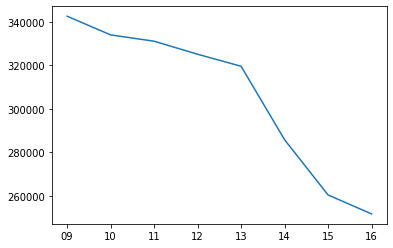

In [174]:
plt.plot(volumn_df['hour'],volumn_df['count'])

In [160]:
??sns.displot()